# Задача 1
Постройте график

Назовите график

Сделайте именование оси x и оси y

Сделайте выводы

## 1.1.
Данные из прошлого дз

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df = pd.read_csv('kc_house_data.csv', sep=',')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## 1.2
Изучите стоимости недвижимости

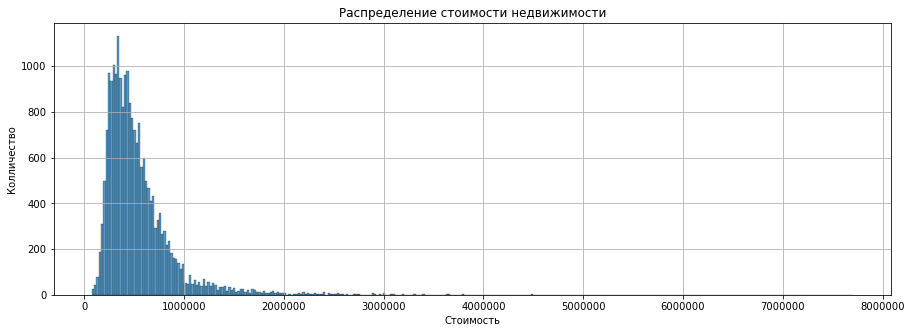

In [42]:
plt.figure(figsize=(15, 5))
sns.histplot(df['price'])
plt.ticklabel_format(style='plain')
plt.grid()
plt.xlabel('Стоимость')
plt.ylabel('Колличество')
plt.title('Распределение стоимости недвижимости');

В основном стоимость домов варьируется от 200 тысяч, до 1 млн. При этом наибольшее колличество домов сотоит около 300 тысяч.

## 1.3
Изучите распределение квадратуры жилой

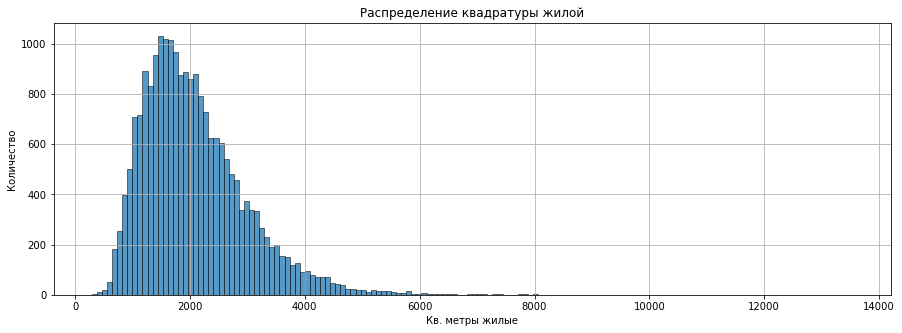

In [44]:
plt.figure(figsize=(15, 5))
sns.histplot(df['sqft_living'], bins=150)
plt.ticklabel_format(style='plain')
plt.grid()
plt.title('Распределение квадратуры жилой')
plt.xlabel('Кв. метры жилые')
plt.ylabel('Количество');

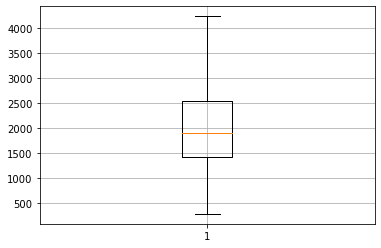

In [49]:
plt.boxplot(df['sqft_living'], showfliers=False)
plt.grid();


Средняя жилая площадь около 1900 кв. метров. Что это за дома? Я таких не знаю.

## 1.4 
Изучите распределение года постройки

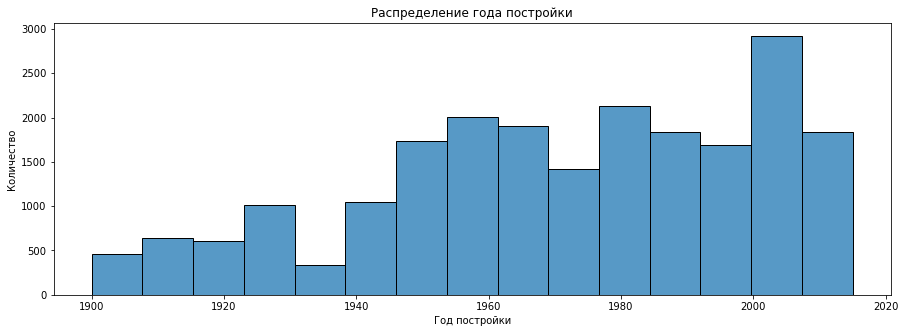

In [58]:
plt.figure(figsize=(15, 5))
sns.histplot(df['yr_built'], bins=15)
plt.title('Распределение года постройки')
plt.xlabel('Год постройки')
plt.ylabel('Количество');

Очень хорошо видны годы Великой депрессии в США и её последствия на ближайшую пятилетку, но уже к концу тридцатых годов строительство набрало прежние темпы, а стустя еще одно десятилетие темп строительства вырос практически на 70-80 процентов. Также видно отражение глубокого экономического кризиса семидесятых на строительстве. Отчетливо видно как с ростом количества ипотечных кредитов выросли темпы строительства в 2000, хотя возможно это связано с рекордным богаством вследствие глобализации.
В итоге видно как состояние экономики страны влияет на темпы строительства жилых домов.

# Задача 2

## 2.1 
Изучите распределение домов от наличия вида на набережную

Постройте график

Сделайте выводы

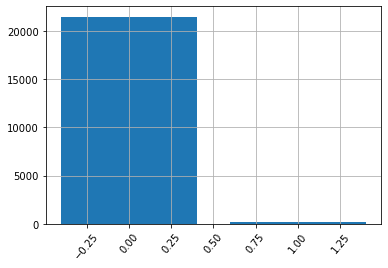

In [59]:
data = df['waterfront'].value_counts()
plt.bar(data.index, data.values)
plt.xticks(rotation=50);
plt.grid()

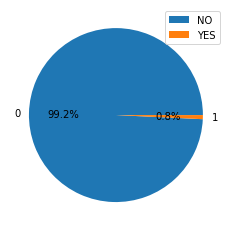

In [62]:
data = df['waterfront'].value_counts()
plt.pie(data.values, labels=data.index, autopct='%1.1f%%');
plt.legend(['NO', 'YES']);

Лишь 0,8% домов могут похвастаться наличием вида на набережную.

## 2.2
Изучите распределение этажей домов


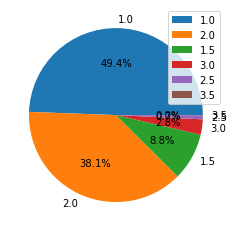

In [63]:
data = df['floors'].value_counts()
plt.pie(data.values, labels=data.index, autopct='%1.1f%%');
plt.legend(data.index);

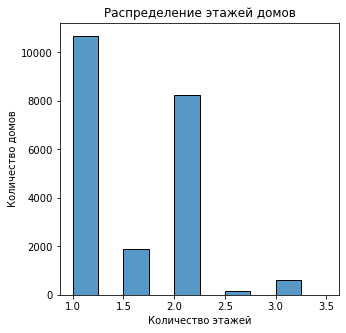

In [72]:
plt.figure(figsize=(5, 5))
sns.histplot(df['floors'], bins=10)
plt.title('Распределение этажей домов')
plt.xlabel('Количество этажей')
plt.ylabel('Количество домов');

Большей популярностью пользуются одноэтажные дома, немного отстают от них дома с двумя этажами, а вот дома с мансардой и дома выше двух этажей составляют лишь малую толику от общего числа домостроений.

## 2.3
Изучите распределение состояния домов

In [82]:
data = df['condition'].value_counts()
data

3    14031
4     5679
5     1701
2      172
1       30
Name: condition, dtype: int64

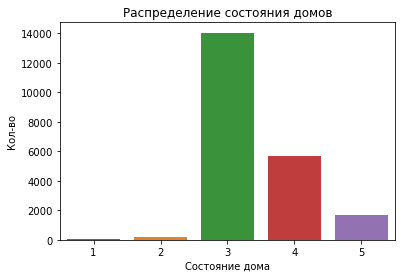

In [83]:
plt.figure(figsize=(6, 4))
sns.barplot(x = data.index, y = data)
plt.title('Распределение состояния домов')
plt.xlabel('Состояние дома')
plt.ylabel('Кол-во');

Дома в основном в нормальном состоянии, брать можно.

# Задача 3

Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.
Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

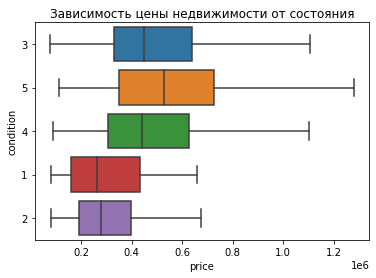

In [90]:
sns.boxplot(x=df['price'], y=df['condition'].astype('str'), whis=1.5, showfliers=False)
plt.title('Зависимость цены недвижимости от состояния');

Действиетльно средняя цена недвижимости выше в зависимости от состояния этой недвижимости, хотя дома на троечку стоят примерно также как и дома на 4.

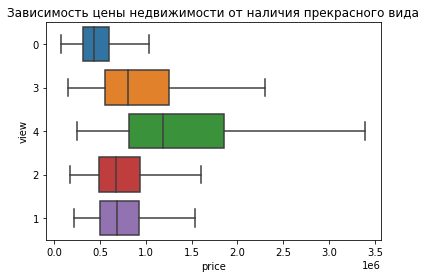

In [92]:
sns.boxplot(x=df['price'], y=df['view'].astype('str'), whis=1.5, showfliers=False)
plt.title('Зависимость цены недвижимости от наличия прекрасного вида');

Дома, которые могут похвастаться прекрасным видом стоят действиетльно дороже.

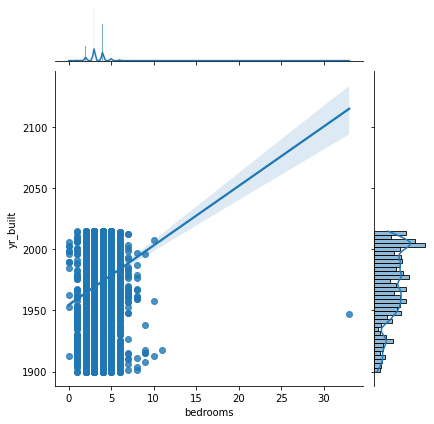

In [94]:
sns.jointplot(x=df['bedrooms'], y=df['yr_built'], kind='reg');

Количество спален не зависит от года постройки.

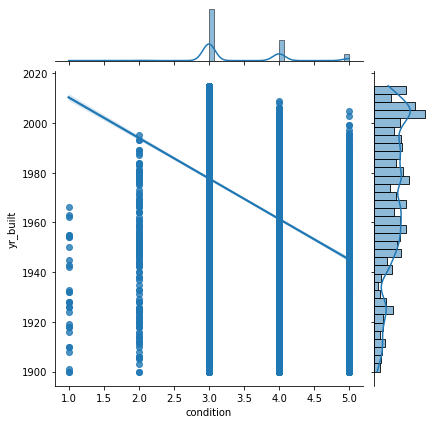

In [96]:
sns.jointplot(x=df['condition'], y=df['yr_built'], kind='reg');

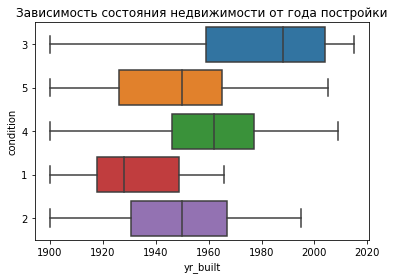

In [98]:
sns.boxplot(x=df['yr_built'], y=df['condition'].astype('str'), whis=1.5, showfliers=False)
plt.title('Зависимость состояния недвижимости от года постройки');

Интересно, что год постройки тоже не говорит о состоянии недвижимости.